# 线性回归的从零开始实现

In [15]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

# 构造数据集
我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$和噪声项$\epsilon$生成数据集及其标签

In [16]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)

    return X, y.reshape((-1, 1))

true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [17]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.0213, 0.0773]) 
label: tensor([3.9886])


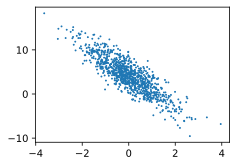

In [18]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

# 读取数据集
 我们定义一个data_iter函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。每个小批量包含一组特征和标签。

In [19]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本随机读取，无特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
                            indices[i:min(i + batch_size, num_examples)]
                        )
        yield features[batch_indices], labels[batch_indices]

In [20]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.9784, -1.2967],
        [-0.1479,  1.1883],
        [-1.1438, -0.0973],
        [-1.3769, -1.4083],
        [ 0.9148, -0.0579],
        [-0.7821, -0.5231],
        [-0.8978,  0.6496],
        [-0.1247,  1.2945],
        [ 0.2108, -0.4094],
        [-0.3879,  0.2086]]) 
 tensor([[12.5879],
        [-0.1382],
        [ 2.2517],
        [ 6.2202],
        [ 6.2277],
        [ 4.3995],
        [ 0.1927],
        [-0.4453],
        [ 5.9913],
        [ 2.7269]])


## 初始化模型参数
通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重，并将偏置初始化为0


In [21]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 定义线性模型

In [22]:
def linreg(X, w, b): #@save
    """线性模型"""
    return torch.matmul(X, w) + b

## 定义损失函数

In [24]:
def squared_loss(y_hat, y):  #@save
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 定义优化算法

In [23]:
def sgd(params, lr, batch_size): #@save
    """
    lr: 学习率
    小批量随机梯度下降
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [26]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # `X`和`y`的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起，
        # 并以此计算关于[`w`, `b`]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050
epoch 4, loss 0.000050
epoch 5, loss 0.000050
epoch 6, loss 0.000050
epoch 7, loss 0.000050
epoch 8, loss 0.000050
epoch 9, loss 0.000050
epoch 10, loss 0.000050


In [27]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-3.1853e-04,  8.9645e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)
